<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">1. Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import ttest_1samp, ttest_ind
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols

<span style="font-family: Arial; font-weight: bold; font-size:1.5em; color:#00b3e5;">2. Read the data as a data frame

In [2]:
insurance = pd.read_csv('insurance.csv') #import the dataset named insurance.csv

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">3. Perform basic EDA which should include the following and print out your insights at every step

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#b2dc62;">a. Shape of the data

In [11]:
insurance.shape #see the shape of the data

(1338, 7)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#b2dc62;">b. Data type of each attribute

In [11]:
insurance.dtypes #see the data type of all the attributes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#b2dc62;">c. Checking the presence of missing values

In [26]:
insurance.isnull().values.any() #checks for presence of any missing values in the entire dataframe

False

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#b2dc62;">d. Five point summary of numerical attributes

In [27]:
insurance.describe() # the output results provide the five number summary of the numerical attributes in insurance dataframe.

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#b2dc62;">e. Distribution of 'bmi','age' and 'charges' columns

Text(0.5, 0.98, 'Distribution of bmi')

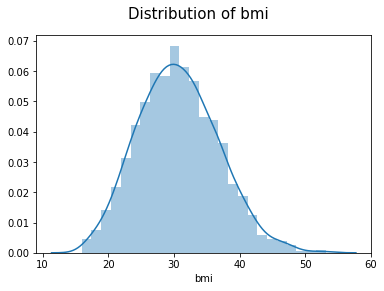

In [21]:
sns.distplot(insurance['bmi']) # distribution of bmi column
plt.suptitle('Distribution of bmi',fontsize=15)

Text(0.5, 0.98, 'Distribution of age')

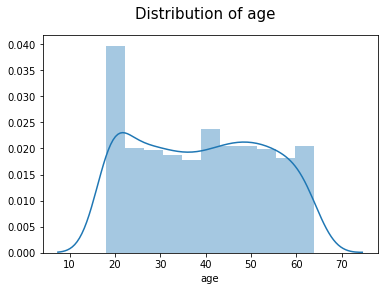

In [22]:
sns.distplot(insurance['age']) # distribution of age column
plt.suptitle('Distribution of age',fontsize=15)

Text(0.5, 0.98, 'Distribution of charges')

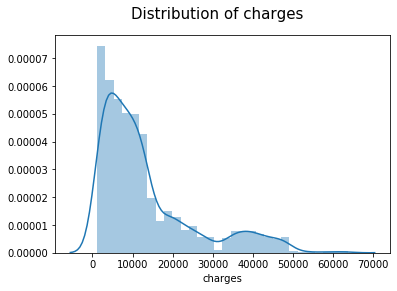

In [23]:
sns.distplot(insurance['charges']) # distribution of charges column
plt.suptitle('Distribution of charges',fontsize=15)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#b2dc62;">f. Measure of skewness of 'bmi','age' and 'charges' columns

In [34]:
insurance['bmi'].skew() #measures skewness of bmi column

0.2840471105987448

In [35]:
insurance['age'].skew() #measures skewness of age column

0.05567251565299186

In [36]:
insurance['charges'].skew() #measures skewness of charges column

1.5158796580240388

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#b2dc62;">g. Checking the presence of outliers in 'bmi','age' and 'charges' columns

Text(0.5, 0.98, 'Box plot for bmi')

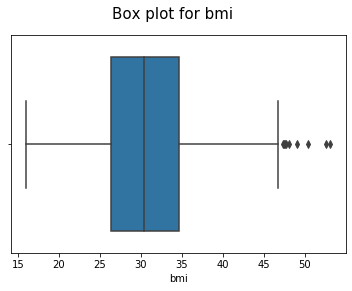

In [24]:
sns.boxplot(insurance['bmi']) #boxplot shows the persence of outliers
plt.suptitle('Box plot for bmi',fontsize = 15)

Text(0.5, 0.98, 'Box plot for age')

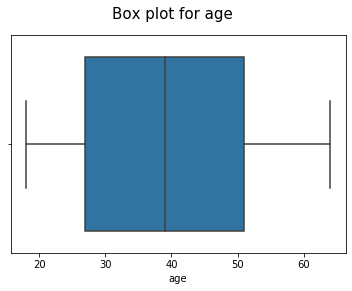

In [25]:
insurance[np.abs(stats.zscore(insurance['age']) ) > 3]
sns.boxplot(insurance['age']) #boxplot shows the persence of outliers
plt.suptitle('Box plot for age',fontsize = 15)

Text(0.5, 0.98, 'Box plot for charges')

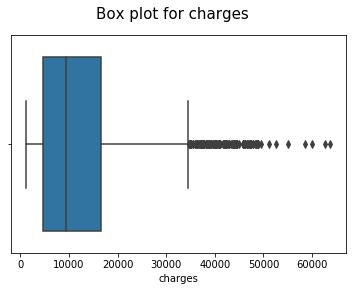

In [26]:
insurance[np.abs(stats.zscore(insurance['charges']) ) > 3]
sns.boxplot(insurance['charges']) #boxplot shows the persence of outliers
plt.suptitle('Box plot for charges',fontsize = 15)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#b2dc62;">h. Distribution of categorical columns (include children)

Text(0.5, 0.98, 'Distribution of Sex')

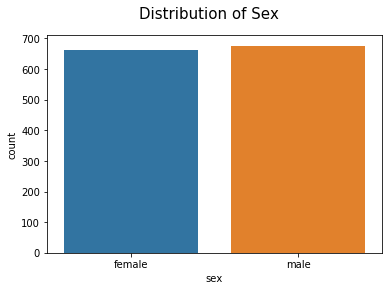

In [27]:
sns.countplot(insurance['sex']) # countplot shows the distribution of categorical values
plt.suptitle('Distribution of Sex',fontsize=15)

Text(0.5, 0.98, 'Distribution of Children')

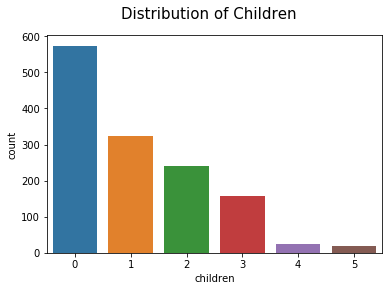

In [28]:
sns.countplot(insurance['children'])# countplot shows the distribution of categorical values
plt.suptitle('Distribution of Children',fontsize=15)

Text(0.5, 0.98, 'Distribution of Smoker')

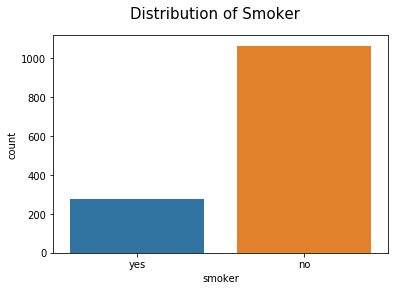

In [29]:
sns.countplot(insurance['smoker'])# countplot shows the distribution of categorical values
plt.suptitle('Distribution of Smoker',fontsize=15)

Text(0.5, 0.98, 'Distribution of Region')

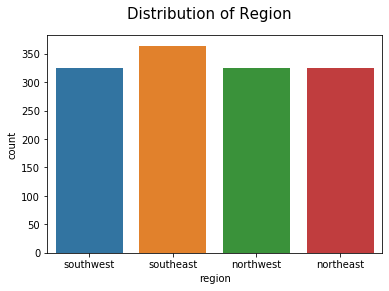

In [30]:
sns.countplot(insurance['region'])# countplot shows the distribution of categorical values
plt.suptitle('Distribution of Region',fontsize=15)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#b2dc62;">i. Pair plot that includes all the columns of the data framce

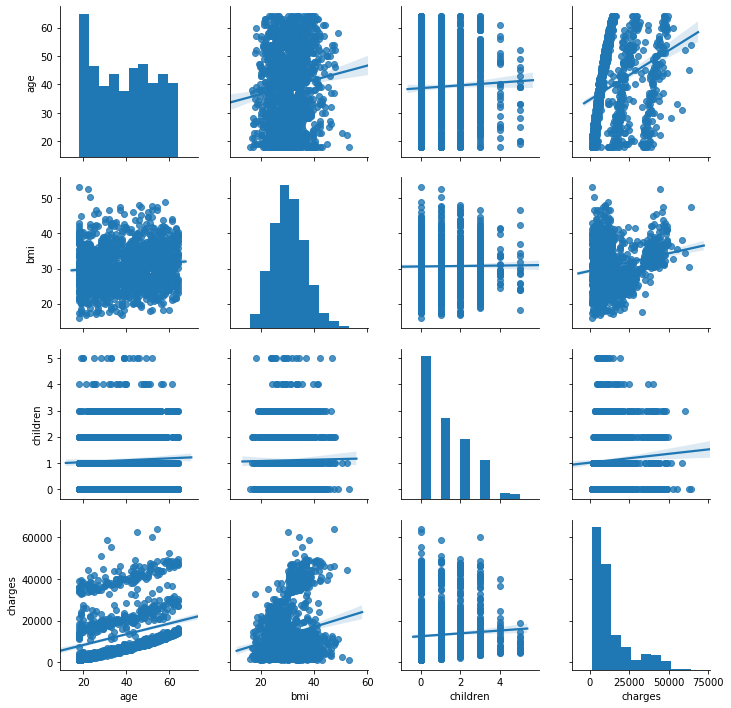

In [31]:
sns.pairplot(insurance,kind="reg")

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">4. Answer the following questions with statistical evidence

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#b2dc62;">a. Do charges of people who smoke differ significantly from the people who don't?

## Two Sample t-test

* We want to see if the charges of people who smoke differ significantly from people who don't smoke

#### Ho = The two groups have the same mean
#### Ha = The two groups have different mean

In [4]:
smokers_charges = insurance[insurance['smoker'] == 'yes'].charges #charges of people who smoke
non_smokers_charges = insurance[insurance['smoker'] == 'no'].charges # charges of people who don't smoke
t_statistic, p_value = ttest_ind(smokers_charges, non_smokers_charges)  
print(t_statistic, p_value)

46.664921172723716 8.271435842177219e-283


In [5]:
# p_value < 0.05 => alternative hypothesis:
# they don't have the same mean at the 5% significance level
print ("two-sample t-test p-value=", p_value)

two-sample t-test p-value= 8.271435842177219e-283


#### The p_value is significantly less than 0.05 or 0.01 hence we reject the null hypothesis.
#### There is significant different in charges of people who smoke from people who don't smoke

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#b2dc62;">b. Does bmi of male differ significantly from that of females?

## Two Sample t-test

* We want to see if bmi of male differ significantly from that of females

#### Ho = The two groups have the same mean
#### Ha = The two groups have different mean

In [6]:
bmi_male = insurance[insurance['sex'] == 'male'].bmi # bmi of male
bmi_female = insurance[insurance['sex'] == 'female'].bmi #bmi of female
t_statistic, p_value = ttest_ind(bmi_male, bmi_female)
print(t_statistic, p_value)

1.696752635752224 0.08997637178984932


In [7]:
# p_value < 0.05 => alternative hypothesis:
# they don't have the same mean at the 5% significance level
print ("two-sample t-test p-value=", p_value)

two-sample t-test p-value= 0.08997637178984932


#### The p_value is more than 0.05  hence we rerain the null hypothesis.
#### There is no significant difference in bmi of males to that of females

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#b2dc62;">c. Is the proportion of smokers significantly different in different genders?

## Test of Proportion

* 'sex' and 'smoker' are two categorical variables
* We want to see if the proportion of smokers in the female population is significantly different than the male population
#### Ho = The proportions are equal
#### Ha = The two proportions are not equal

In [8]:
female_smokers = insurance[insurance['sex'] == 'female'].smoker.value_counts()[1] #no of female smokers
male_smokers = insurance[insurance['sex'] == 'male'].smoker.value_counts()[1] #no of male smokers
n_females = insurance.sex.value_counts()[1] # total no of female
n_males = insurance.sex.value_counts()[0] # total no of male
print(f' Proportion of smokers in females, males = {round(female_smokers/n_females,2)}%, {round(male_smokers/n_males,2)}% respectively')

 Proportion of smokers in females, males = 0.17%, 0.24% respectively


To test if they are statistically different

In [9]:
stat, pval = proportions_ztest([female_smokers, male_smokers] , [n_females, n_males])

if pval < 0.05:
    print(f'With a p-value of {round(pval,4)} the difference is significant. Hence, We reject the null|')
else:
    print(f'With a p-value of {round(pval,4)} the difference is not significant. Hence, We fail to reject the null|')

With a p-value of 0.0053 the difference is significant. Hence, We reject the null|


#### The proportions of smokers in male is different that of female

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#b2dc62;">d. Is the distribution of bmi across women with no children, one child and two children, the same?

In [3]:
no_child = insurance[insurance['children']== 0]
no_child_female = no_child[no_child['sex'] == 'female'].bmi
one_child = insurance[insurance['children']== 1]
one_child_female = one_child[one_child['sex'] == 'female'].bmi
two_child = insurance[insurance['children']== 2]
two_child_female = two_child[two_child['sex'] == 'female'].bmi

In [4]:
print('Count, Mean and standard deviation of bmi across women with no children: %3d, %3.2f and %3.2f' % (len(no_child_female), no_child_female.mean(),np.std(no_child_female ,ddof =1)))
print('Count, Mean and standard deviation of bmi across women with one children: %3d, %3.2f and %3.2f' % (len(one_child_female), one_child_female.mean(),np.std(one_child_female,ddof =1)))
print('Count, Mean and standard deviation of bmi across women with two children: %3d, %3.2f and %3.2f' % (len(two_child_female), two_child_female.mean(),np.std(two_child_female,ddof =1)))

Count, Mean and standard deviation of bmi across women with no children: 289, 30.36 and 5.97
Count, Mean and standard deviation of bmi across women with one children: 158, 30.05 and 5.79
Count, Mean and standard deviation of bmi across women with two children: 119, 30.65 and 6.63


In [17]:
insurance[insurance['children']<= 2]['sex'].value_counts() #total number of male and female with children less than or equal to 2

male      572
female    566
Name: sex, dtype: int64

In [7]:
bmi_df = pd.DataFrame()

df1            = pd.DataFrame({'No_of_Children': '0', 'bmi':no_child_female})
df2            = pd.DataFrame({'No_of_Children': '1', 'bmi':one_child_female})
df3            = pd.DataFrame({'No_of_Children': '2', 'bmi':two_child_female})

bmi_df = bmi_df.append(df1) 
bmi_df = bmi_df.append(df2) 
bmi_df = bmi_df.append(df3) 

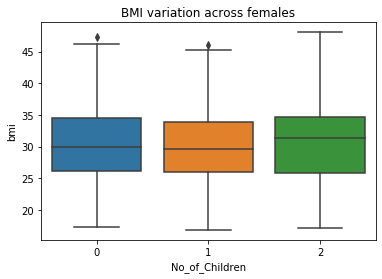

In [9]:
sns.boxplot(x = "No_of_Children", y = "bmi", data = bmi_df)
plt.title('BMI variation across females')
plt.show()

### Step 1: State the null and alternative hypothesis:

* $H_0$: $\mu1$ = $\mu2$ = $\mu3$
* $H_A$: At least one $\mu$ differs 

Here $\mu1$, $\mu2$ and $\mu3$ are the bmi of women with no children, one child and two children respectively.

### Step 2: Decide the significance level
Here we select α = 0.05

### Step 3: Identify the test statistic
Here we have three groups. Analysis of variance can determine whether the means of three or more groups are different. ANOVA uses F-tests to statistically test the equality of means.

### Step 4: Calculate p value using ANOVA table

In [12]:
mod = ols('bmi ~ C(No_of_Children)', data = bmi_df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                         sum_sq     df         F    PR(>F)
C(No_of_Children)     24.590123    2.0  0.334472  0.715858
Residual           20695.661583  563.0       NaN       NaN


### Step 5:  Decide to reject or accept null hypothesis

In this example, p value is 0.715858 and it is more than our chosen level of signifance at 5%

So the statistical decision is we fail to reject the null hypothesis at 5% level of significance.

### So there is  sufficient evidence that bmi of women with no children, one children and two children are same